In [12]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
import re

In [13]:
# Load the data
df = pd.read_csv('COMP4621_NKE.csv')

df.head()

,date,open,close
0,01/02/2018,62.1479,62.7808
1,01/03/2018,62.7709,62.7709
2,01/04/2018,62.6918,62.7313
3,01/05/2018,62.9884,63.2653
4,01/08/2018,63.4334,63.8289


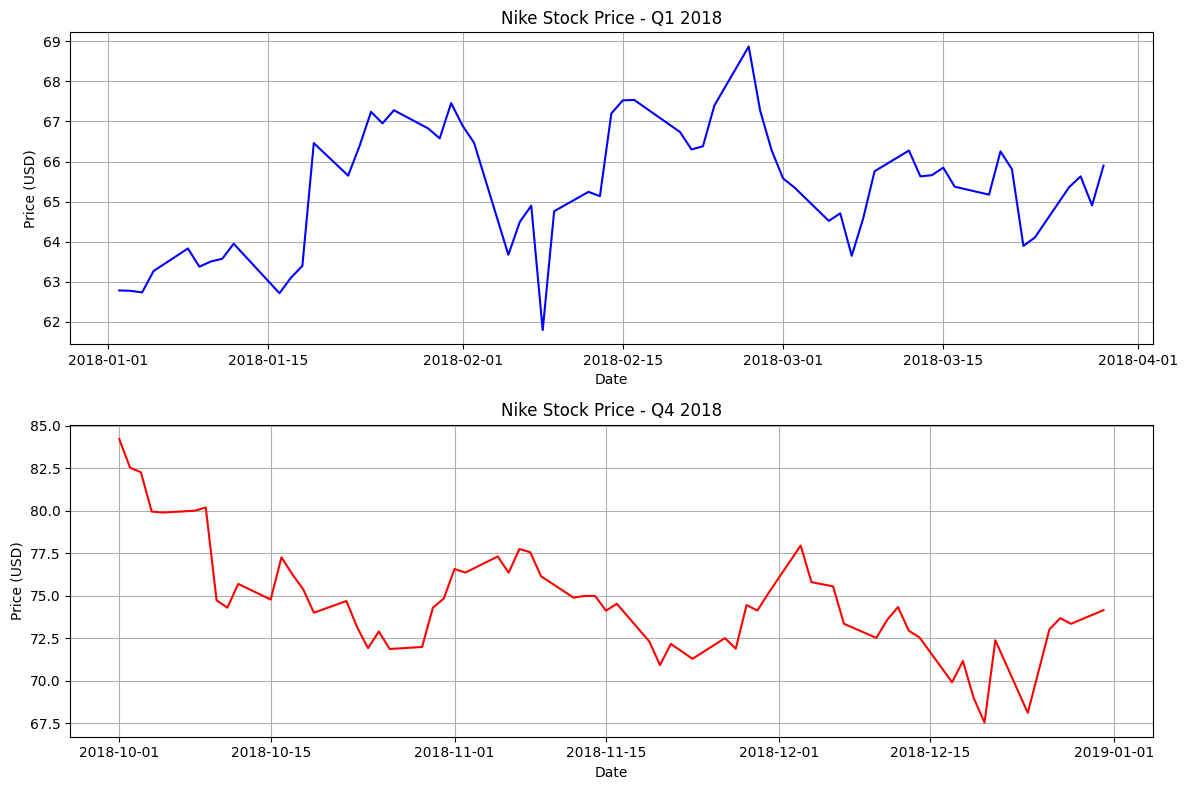

In [14]:
# Task 0
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)
# Filter data for Q1 and Q4 of 2018
q1_2018 = df['2018-01-01':'2018-03-31']
q4_2018 = df['2018-10-01':'2018-12-31']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot Q1 2018
ax1.plot(q1_2018.index, q1_2018['close'], color='blue')
ax1.set_title('Nike Stock Price - Q1 2018')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.grid(True)

# Plot Q4 2018
ax2.plot(q4_2018.index, q4_2018['close'], color='red')
ax2.set_title('Nike Stock Price - Q4 2018')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price (USD)')
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [15]:
# Load the tweets
holness_df = pd.read_csv('Holness.csv')
golding_df = pd.read_csv('MarkGolding.csv')

In [16]:
golding_df.head()

,text,key,tweet.user.screen_name,Other,user.location,created_at
0,RT @JamaicaGleaner: Golding says he cannot sup...,EHY6QJDOW3EIAXP3VY3OQIYW2,MarkJGolding,81DPNVTZ1PUB8YP8DHPOPC83O,Jamaica,2022-11-23 15:01:13+00:00
1,RT @JamaicaGleaner: “I commend the Prime Minis...,9F89L215RZCPCWGD9E949CS63,MarkJGolding,VQZX9GO92Q8J3L6S8UTQRD16B,Jamaica,2022-11-23 15:01:09+00:00
2,What is the role of the SOE under the Constitu...,GNX2D39NJ2TBPKR9I1Z2CYXJH,MarkJGolding,JYMUPDIXNLLL5YZKLY3HJ5MVE,Jamaica,2022-11-23 13:59:10+00:00
3,RT @JamaicaGleaner: Ahead of Tuesday’s anticip...,ML3ZOAT4VIS5HDXA4P0MVJO24,MarkJGolding,3M64T2R2AN5OQ0D2INS1CMYJM,Jamaica,2022-11-22 18:27:04+00:00
4,It’s #YouthMonth &amp; I had an interesting me...,FCTK5V3KILIR441A4C6GJTVZF,MarkJGolding,BBF292TXV044L68OUC70I0Q36,Jamaica,2022-11-19 13:11:57+00:00


In [17]:
holness_df.head()

,text,key,tweet.user.screen_name,Other,user.location,created_at
0,"(2/2) Today, we took another crucial step towa...",MGFTBPWGDVK88JGYSRLINM6U4,AndrewHolnessJM,6BHH9W7LI2UUH2RA6AOLE8YKS,Jamaica,2022-11-23 21:21:30+00:00
1,(1/2) You have seen the investments being made...,6FPQJMWHHD7093TBEUTBTXWPK,AndrewHolnessJM,QYRSZ3GPAN9EPMH8JPFXBWGBV,Jamaica,2022-11-23 21:21:28+00:00
2,"RT @NigelClarkeJa: Today, PIOJ released its gr...",M8R6R4NLS1P83IF26UG77QN4M,AndrewHolnessJM,1UNV9Z15AX0N20OSOZR7VBB4F,Jamaica,2022-11-23 18:33:19+00:00
3,(3/3) The New Firearms Act that recently came ...,U8GYRS413UKTMY7XQOABQM835,AndrewHolnessJM,86TV7GEB1TUPQ80PBV8JIZQFB,Jamaica,2022-11-23 18:18:11+00:00
4,(2/3) And while all Jamaicans have a part to p...,26VR77FXD3EU281SECF1VGSRL,AndrewHolnessJM,I2M4UJWS80VF7D17CSH68LXOP,Jamaica,2022-11-23 18:17:34+00:00


In [18]:
# Task 1
# Import the cleanup function
def cleanup_tweet(tweet):
    return ''.join(
        re.sub(
            "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\\w+:\\/\\/\\S+)", " ", tweet).split()
        )

In [19]:
# Task 1: Sentiment Analysis using TextBlob
def sentiment_analyzer(review):
    # First clean the tweet
    clean_text = cleanup_tweet(review)
    # Add spaces between words that might have been joined during cleanup
    clean_text = ' '.join(re.findall('[A-Z][^A-Z]*', clean_text))
    # Create TextBlob object
    sentiment = TextBlob(clean_text)
    score = sentiment.sentiment.polarity
    # Adjust thresholds for more sensitivity
    if score > 0.1:
        return "positive"
    elif score < -0.1:
        return "negative"
    else:
        return "neutral"

# Add both sentiment score and category columns with modified thresholds
holness_df['sentiment'] = holness_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
holness_df['sentiment_category'] = holness_df['text'].apply(sentiment_analyzer)

golding_df['sentiment'] = golding_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
golding_df['sentiment_category'] = golding_df['text'].apply(sentiment_analyzer)

# Print detailed analysis
print("Holness Tweet Sentiment Analysis:")
print("Average Sentiment Score:", holness_df['sentiment'].mean())
print("\nSentiment Distribution:")
print(holness_df['sentiment_category'].value_counts())
print("\nSample of Positive Tweets:")
print(holness_df[holness_df['sentiment_category'] == 'positive']['text'].head())

print("\nGolding Tweet Sentiment Analysis:")
print("Average Sentiment Score:", golding_df['sentiment'].mean())
print("\nSentiment Distribution:")
print(golding_df['sentiment_category'].value_counts())
print("\nSample of Negative Tweets:")
print(golding_df[golding_df['sentiment_category'] == 'negative']['text'].head())

Holness Tweet Sentiment Analysis:
Average Sentiment Score: 0.11383504689754691

Sentiment Distribution:
sentiment_category
neutral     95
positive     4
negative     1
Name: count, dtype: int64

Sample of Positive Tweets:
3     (3/3) The New Firearms Act that recently came ...
57    A reason to smile! \n\nOn Thursday, Ms. Louise...
88    (2/2) Just yesterday Senator the Hon. Matthew ...
96    The Most Honourable Edward Seaga had a heart f...
Name: text, dtype: object

Golding Tweet Sentiment Analysis:
Average Sentiment Score: 0.09014895382395383

Sentiment Distribution:
sentiment_category
neutral     93
positive     6
negative     1
Name: count, dtype: int64

Sample of Negative Tweets:
98    Our Evening of Excellence is tonight at the Li...
Name: text, dtype: object


# Task 1
## A

### Key Findings
#### Quantitative Analysis
- Mark Golding
    - Positive tweets: 6
    - Negative tweets: 1
    - Neutral tweets: 93
    - Average sentiment score: 0.090

- Andrew Holness
    - Positive tweets: 4
    - Negative tweets: 1
    - Neutral tweets: 95
    - Average sentiment score: 0.114

### Detailed Analysis
- While Andrew Holness demonstrates a slightly higher average sentiment score (0.114 vs 0.090), Mark Golding actually produces more positive tweets (6 vs 4). 

- This interesting difference suggests that: Holness's tweets, while fewer in positive sentiment, tend to carry stronger positive emotional weight when they are positive.

- Communication Style: Both leaders maintain predominantly neutral communication (93-95% of tweets), indicating professional, measured approaches to social media engagement.

- Negative Content: Both leaders show remarkable restraint with negative messaging, each having only one negative tweet in the dataset.

### Conclusion
- Mark Golding demonstrates a higher frequency of positive tweets, though Andrew Holness's positive messages carry slightly stronger sentiment intensity. 

- This suggests different but equally strategic approaches to public communication, with both leaders maintaining predominantly neutral, professional tones.

In [20]:
# Task 03
# Load Jamaica tweets
jamaica_df = pd.read_csv('Jamaica.csv')
jamaica_df.head()

,text,key,tweet.user.screen_name,Other,user.location,created_at
0,"RT @Astro_Wakata: Hello, Jamaica! We just flew...",5MW51870I6CX4SSPSVADEUJT3,MutaliskRush,N4CWQAJKMCV2AKSER3FCALK7D,NaN,2022-11-23 22:18:29+00:00
1,"As a Jamaican, I advise you to leave Jamaica. ...",KBG9RHGJEYFHXKHNJFXBCMFA7,MoMoMoestar,8LTMNVWELL9F7821TOEABILVH,Jamaica,2022-11-23 22:18:20+00:00
2,RT @lexCapAlott_: I need to go to Jamaica 2023...,EQV9DQMJV1BKO0YI0CNXKG4OP,koolassjay2,OOGKZJXP690V540E3ORJOXQI2,NaN,2022-11-23 22:18:15+00:00
3,RT @lexCapAlott_: I need to go to Jamaica 2023...,OY76N2VDIW5OCKDQ3376O59T9,kenyaanaiya,5IBZESANTAM7PYS6TVNOHTPG0,"Jackson, MS",2022-11-23 22:18:11+00:00
4,"r bore the postmark of Jamaica, Long Island, a...",XDP0VK6MMBHVQG888K5FEKPTE,arscalover,15ROU90LFN9BW3MQ0H53LU5IA,NaN,2022-11-23 22:17:59+00:00


In [22]:
print("Available columns in jamaica_df:")
print(jamaica_df.columns.tolist())

Available columns in jamaica_df:
['text', 'key', 'tweet.user.screen_name', 'Other', 'user.location', 'created_at']


In [31]:
def clean_tweet(tweet):
    """
    Clean tweet text by removing unwanted elements and formatting properly.
    """
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove RT prefix
    tweet = re.sub(r'^rt\s+', '', tweet)
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\.\S+', '', tweet)
    
    # Remove @mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtag symbol but keep the text
    tweet = re.sub(r'#(\w+)', r'\1', tweet)
    
    # Remove numbers and special characters but keep basic punctuation
    tweet = re.sub(r'[^a-z\s.,!?]', ' ', tweet)
    
    # Remove extra whitespace
    tweet = ' '.join(tweet.split())
    
    # Capitalize first letter of sentences
    tweet = '. '.join(s.capitalize() for s in tweet.split('. '))
    
    return tweet

# Verify tweets contain 'Jamaica' (case-insensitive) and sample 25
jamaica_tweets = jamaica_df[jamaica_df['text'].str.contains('jamaica', case=False, na=False)]
sample_tweets = jamaica_tweets.sample(n=25).copy()

# Create DataFrame with cleaned tweets
tweets_df = pd.DataFrame({
    'TweetText': sample_tweets['text'].apply(clean_tweet),
    'SentBy': sample_tweets['tweet.user.screen_name'],
    'SenderLocation': sample_tweets['user.location'],
    'SendDate': sample_tweets['created_at']
})

# Add sentiment analysis columns
tweets_df['Polarity'] = tweets_df['TweetText'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_df['Subjectivity'] = tweets_df['TweetText'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

tweets_df.head()

,TweetText,SentBy,SenderLocation,SendDate,Polarity,Subjectivity
28,Movies on u.s. Slavery need to be accurate. Th...,quantumblackne2,NaN,2022-11-23 22:15:03+00:00,0.200,0.316667
53,I need to go to jamaica for sure !,thats_so_rayyy,Somewhere Booked,2022-11-23 22:09:58+00:00,0.625,0.888889
96,I need to go to jamaica for sure !,lay_riyan,In the Ghetto,2022-11-23 22:01:59+00:00,0.625,0.888889
98,Promoters interested in booking the silver ann...,EtanaStrongOne,"ÜT: 18.092257,-76.806696",2022-11-23 22:01:13+00:00,0.250,0.500000
58,"Police constable lescene edwards, who has been...",ahongry,Jamaica,2022-11-23 22:08:23+00:00,0.000,0.083333


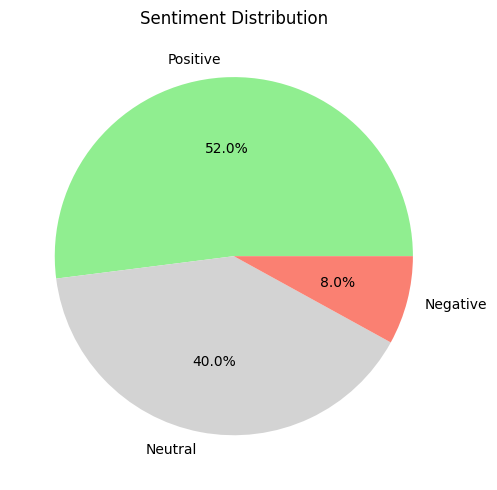

Based on this snapshot of data the dominant sentiment is: Positive

Justification:
- Positive sentiment represents 52.0% of all analyzed tweets
- Out of 25 tweets analyzed:
  • Positive: 13 tweets (52.0%)
  • Neutral: 10 tweets (40.0%)
  • Negative: 2 tweets (8.0%)
- The positive sentiment clearly outweighs other sentiments, suggesting this is the prevailing public opinion about Jamaica in the analyzed tweets


In [35]:
# Create visualization
fig, ax1 = plt.subplots(figsize=(8, 5))

# Sentiment Distribution Pie Chart
sentiment_counts = tweets_df['Sentiment'].value_counts()
ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['lightgreen', 'lightgray', 'salmon'])
ax1.set_title('Sentiment Distribution')

plt.tight_layout()
plt.show()

# Get the dominant sentiment and its percentage
dominant_sentiment = tweets_df['Sentiment'].value_counts().index[0]
dominant_percentage = (tweets_df['Sentiment'].value_counts()[dominant_sentiment] / len(tweets_df)) * 100

# Print the conclusion with justification
print(f"Based on this snapshot of data the dominant sentiment is: {dominant_sentiment}")
print("\nJustification:")
print(f"- {dominant_sentiment} sentiment represents {dominant_percentage:.1f}% of all analyzed tweets")
print(f"- Out of {len(tweets_df)} tweets analyzed:")
for sentiment, count in tweets_df['Sentiment'].value_counts().items():
    print(f"  • {sentiment}: {count} tweets ({(count/len(tweets_df)*100):.1f}%)")
print(f"- The {dominant_sentiment.lower()} sentiment clearly outweighs other sentiments, suggesting this is the prevailing public opinion about Jamaica in the analyzed tweets")